In [32]:
#Leitura de dados
import pandas as pd 

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

#Trnsformação dos dados
from sklearn.preprocessing import StandardScaler

#Algorítimo a ser usado para o cluster dos clientes
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

#Para diminuir a dimensionalidade da base de dados
from sklearn.decomposition import PCA

#Biblioteca responsável por calculos 
import numpy as np

#Metodo para avaliação do cluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [33]:
df = pd.read_csv("../Dados/Dados de clientes tratados.csv")
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Como os dados estão em escalas diferentes, vai ser preciso de uma transformação deles antes de passa-los para os modelos de cluster, para isso irei utilizar o StandardScaler que irá escalar todos os dados e deixa-los prontos para a clusterização!

In [34]:
df = df.drop(columns="Unnamed: 0", axis =1)
transformadorDados = StandardScaler()
dfTransformado = transformadorDados.fit_transform(df)
dfCluster = pd.DataFrame(dfTransformado, columns = df.columns)
dfCluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


Agora com os dados transformados, já posso passa-los para os modelos, mas antes irei utilizar o PCA para diminuir a dimensionalidade da base de dados:

O PCA (Análise de Componentes Principais) é uma técnica eficaz para reduzir a dimensionalidade da base de dados, transformando variáveis correlacionadas em componentes principais independentes. Isso ajuda a eliminar redundâncias, simplificar os dados e destacar os padrões mais relevantes. No contexto do projeto de clustering, o PCA melhora o desempenho ao reduzir o ruído nos dados e facilita a identificação de grupos, tornando a análise mais clara e os clusters mais precisos.

In [35]:
scaler = StandardScaler()
dfScalared = scaler.fit_transform(df)

# PCA
pca = PCA()
pca.fit(dfScalared)

# Variância explicada
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance.cumsum()

# Exibindo a variância explicada por cada componente
for i, (var, cum_var) in enumerate(zip(explained_variance, explained_variance_cumulative), 1):
    print(f"Componente {i}: Variância explicada = {var:.2%}, Variância acumulada = {cum_var:.2%}")

Componente 1: Variância explicada = 27.23%, Variância acumulada = 27.23%
Componente 2: Variância explicada = 20.37%, Variância acumulada = 47.61%
Componente 3: Variância explicada = 8.92%, Variância acumulada = 56.52%
Componente 4: Variância explicada = 7.57%, Variância acumulada = 64.10%
Componente 5: Variância explicada = 6.28%, Variância acumulada = 70.37%
Componente 6: Variância explicada = 5.71%, Variância acumulada = 76.09%
Componente 7: Variância explicada = 4.92%, Variância acumulada = 81.00%
Componente 8: Variância explicada = 4.21%, Variância acumulada = 85.21%
Componente 9: Variância explicada = 3.68%, Variância acumulada = 88.90%
Componente 10: Variância explicada = 3.08%, Variância acumulada = 91.98%
Componente 11: Variância explicada = 2.36%, Variância acumulada = 94.34%
Componente 12: Variância explicada = 1.77%, Variância acumulada = 96.12%
Componente 13: Variância explicada = 1.43%, Variância acumulada = 97.54%
Componente 14: Variância explicada = 1.18%, Variância acum

Analisando a quantidade de componentes e sua variância, decidi usar só 4 componentes principais pois isso vai ajusar reduzir o ruido e a dimensionalidade dos dados, dessa maneira deixando o cluster mais eficiente! Agora vamos analisar os melhores atributos para cada modelo de cluster e depois com para-los!

2 70883.62579169228 0.3020234279377257
3 55874.12515319722 0.33645950004376374
4 44089.55216429259 0.3175234799153934
5 38224.556126455645 0.31232525986614823
6 34286.71003911437 0.28661209411885247
7 31234.335986902028 0.2799386539639664
8 28555.542853716182 0.27390345618395523
9 26718.621227311793 0.28145246163106274
10 25220.344827316047 0.25854393882310905


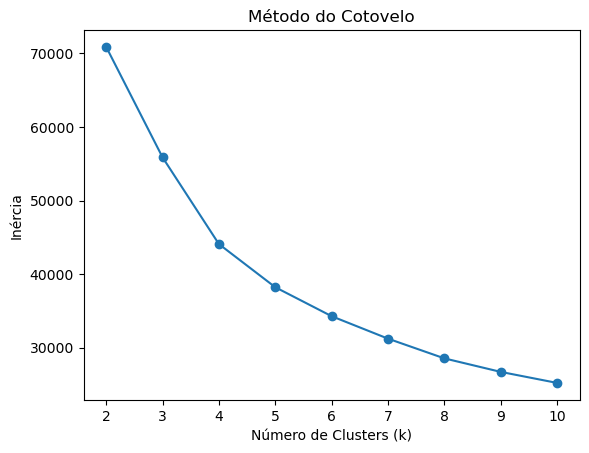

In [36]:
pca = PCA(n_components=4) 
dfPCA = pca.fit_transform(dfScalared)
dfPCA = pd.DataFrame(dfPCA, columns=["PCA1", "PCA2", "PCA3", "PCA4"])#Base de dados que será usada para os testes de validação de cluster

inertias = []
K_range = range(2, 11)  # Testa de 1 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dfPCA) 
    labels = kmeans.fit_predict(dfPCA)
    metrica = silhouette_score(dfPCA, labels)
    inertias.append(kmeans.inertia_)
    print(k, kmeans.inertia_, metrica)
    print

# Plot
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

Aqui como apartir do 4 a inercia começa a diminuir, prefiro continuar com 4 pois vou ter uma visão mais abrangente dos dados e como os dados estão sendo divididos em 3 não tem um aumento muito grande, irei continuar com os 4 cluster no Kmeans

k	AIC		BIC		Silhouette
--------------------------------------------
2	118612.4	118817.2	0.2853
3	105163.0	105473.8	0.1492
4	100872.7	101289.4	0.1120
5	97850.0	98372.7	0.0649
6	95119.8	95748.5	0.0170
7	94623.2	95357.8	0.0071
8	92940.9	93781.4	-0.0165
9	93870.2	94816.8	0.0007
10	90499.3	91551.8	-0.0276


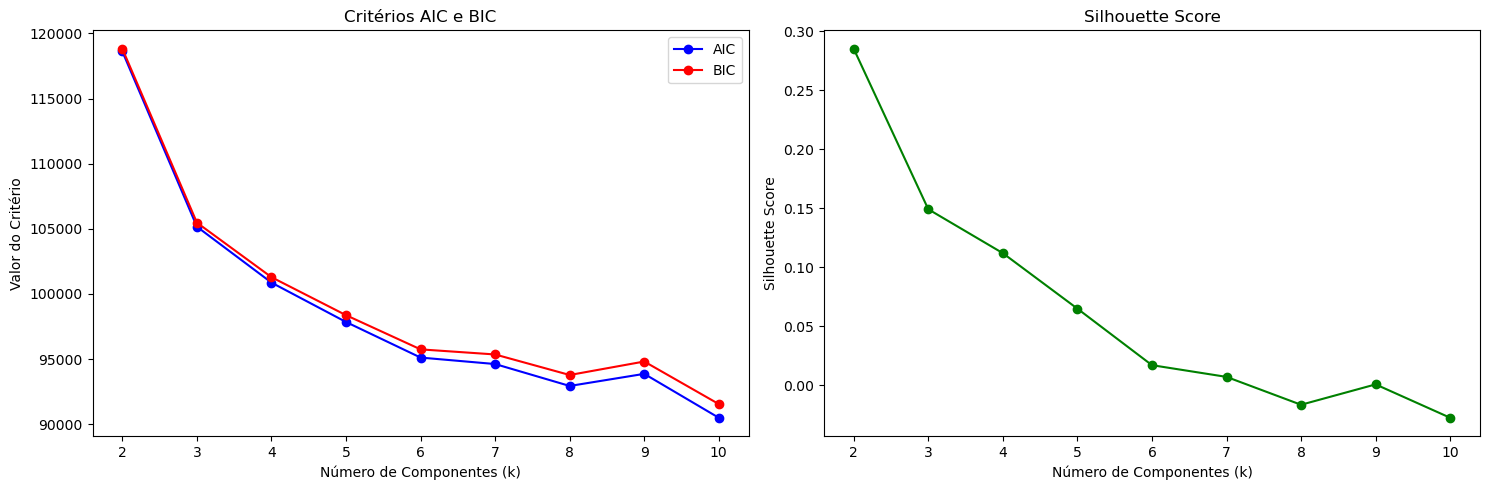

In [37]:
# Listas para armazenar as métricas
aics = []
bics = []
silhouettes = []
K_range = range(2, 11)  # Testando de 2 a 10 componentes

print("k\tAIC\t\tBIC\t\tSilhouette")
print("--------------------------------------------")

for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(dfPCA)
    labels = gmm.predict(dfPCA)
    
    # Calculando as métricas
    aic = gmm.aic(dfPCA)
    bic = gmm.bic(dfPCA)
    silhouette = silhouette_score(dfPCA, labels)
    
    # Armazenando os valores
    aics.append(aic)
    bics.append(bic)
    silhouettes.append(silhouette)
    
    print(f"{k}\t{aic:.1f}\t{bic:.1f}\t{silhouette:.4f}")

# Plotando os gráficos
plt.figure(figsize=(15, 5))

# Gráfico AIC e BIC
plt.subplot(1, 2, 1)
plt.plot(K_range, aics, 'bo-', label='AIC')
plt.plot(K_range, bics, 'ro-', label='BIC')
plt.xlabel('Número de Componentes (k)')
plt.ylabel('Valor do Critério')
plt.title('Critérios AIC e BIC')
plt.legend()
plt.xticks(K_range)

# Gráfico Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, 'go-')
plt.xlabel('Número de Componentes (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.xticks(K_range)

plt.tight_layout()
plt.show()


Aqui com o GaussianMixture houve um silouette score com o 2 n_components(números de clusters), logo continuarei com ele para os testes finais!

In [38]:
eps_values = np.arange(0.1, 1.0, 0.1)
min_samples_values = range(2, 10)

best_score = -1
best_params = {}


for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(dfPCA)
        
        if len(set(labels)) <= 1:
            continue
        
        score = silhouette_score(dfPCA, labels)
        print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}")
        
        if score > best_score:
            best_score = score
            best_params = {"eps": eps, "min_samples": min_samples}


print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

eps: 0.1, min_samples: 2, silhouette score: -0.5606184246847945
eps: 0.1, min_samples: 3, silhouette score: -0.5800061130735913
eps: 0.1, min_samples: 4, silhouette score: -0.554732207151232
eps: 0.1, min_samples: 5, silhouette score: -0.5294269804216376
eps: 0.1, min_samples: 6, silhouette score: -0.5089047811923719
eps: 0.1, min_samples: 7, silhouette score: -0.4837214060179015
eps: 0.1, min_samples: 8, silhouette score: -0.4612469717444728
eps: 0.1, min_samples: 9, silhouette score: -0.43717802401726974
eps: 0.2, min_samples: 2, silhouette score: -0.5134294112866719
eps: 0.2, min_samples: 3, silhouette score: -0.5618183452459278
eps: 0.2, min_samples: 4, silhouette score: -0.5727986151715106
eps: 0.2, min_samples: 5, silhouette score: -0.5335030091665883
eps: 0.2, min_samples: 6, silhouette score: -0.5020694456277541
eps: 0.2, min_samples: 7, silhouette score: -0.4869097853113918
eps: 0.2, min_samples: 8, silhouette score: -0.4366518161010479
eps: 0.2, min_samples: 9, silhouette sco

Com o DBSCAN houve o melhor Silhouette com 0,52 com os seguintes parametros e valores:
   eps = 0.9
   min_samples = 7
 Para o teste final irei ultilizar eses parâmetros para ver qual modelo se sai melhor! Então agora irei pegar os labels de cada modelo com seus respectivos parâmetros!

In [45]:
melhorKmeans = KMeans(n_clusters=4, random_state=42)
labelsKmeans = melhorKmeans.fit_predict(dfPCA)

melhorDBSCAN = DBSCAN(eps= 0.9, min_samples=7)
labelsDBSCAN = melhorDBSCAN.fit_predict(dfPCA)

melhorGaussianMixture = GaussianMixture(n_components=2, random_state=42)
labelsGaussianMixture = melhorGaussianMixture.fit_predict(dfPCA)


In [46]:
scoreSKmeans = silhouette_score(dfPCA, labelsKmeans)
scoreSDBSCAN = silhouette_score(dfPCA, labelsDBSCAN)
scoreSGaussianMixture = silhouette_score(dfPCA, labelsGaussianMixture)

print("Kmeans = ", scoreSKmeans)
print("DBSCAN = ", scoreSDBSCAN)
print("GaussianMixture = ", scoreSGaussianMixture)

Kmeans =  0.3175234799153934
DBSCAN =  0.5246560782369194
GaussianMixture =  0.2852622714977678


In [47]:
scoreSKmeans = calinski_harabasz_score(dfPCA, labelsKmeans)
scoreSDBSCAN = calinski_harabasz_score(dfPCA, labelsDBSCAN)
scoreSGaussianMixture = calinski_harabasz_score(dfPCA, labelsGaussianMixture)

print("Kmeans = ", scoreSKmeans)
print("DBSCAN = ", scoreSDBSCAN)
print("GaussianMixture = ", scoreSGaussianMixture)

Kmeans =  3263.93946757815
DBSCAN =  1499.8161990654407
GaussianMixture =  2588.4110172161127


In [48]:
scoreSKmeans = davies_bouldin_score(dfPCA, labelsKmeans)
scoreSDBSCAN = davies_bouldin_score(dfPCA, labelsDBSCAN)
scoreSGaussianMixture = davies_bouldin_score(dfPCA, labelsGaussianMixture)

print("Kmeans = ", scoreSKmeans)
print("DBSCAN = ", scoreSDBSCAN)
print("GaussianMixture = ", scoreSGaussianMixture)

Kmeans =  1.0702770486131157
DBSCAN =  1.557030035600471
GaussianMixture =  1.4431051393053427


Analisando os resultados, vemos que o que se saiu melhor foi o Kmeans, mas o DBSCAN teve um Silhouette muito bom, então vou analisar se esse Slhouette foi bom mesmo ou ele fez só um cluster, pois os resultados que deram bons no teste de parâmetros, os mesmo estavam muito alto, o que pode ter feito ele fazer somente um cluster, mas para confirmar isso irei analisar quantos cluster ele fez!

In [49]:

# Contagem de pontos por cluster
unique_labels, counts = np.unique(labelsDBSCAN, return_counts=True)

print("Distribuição dos clusters:")
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"  Ruído (label -1): {count} pontos")
    else:
        print(f"  Cluster {label}: {count} pontos")

Distribuição dos clusters:
  Ruído (label -1): 546 pontos
  Cluster 0: 8090 pontos


Ao analisar os resultados, fica evidente que foi realizado apenas um cluster geral, e os ruídos (outliers) foram classificados como -1. Isso indica que o método utilizado não conseguiu segmentar bem os clientes. Por isso, irei utilizar o K-means, que apresentou um desempenho superior.

Agora, finalmente, analisarei as estatísticas de cada cluster para identificar padrões importantes nos clientes. Antes disso, adicionarei os clusters à base de dados e verificarei quais colunas apresentam diferenças significativas nos valores. Essas colunas destacarão padrões distintos e permitirão uma análise mais eficiente, evitando o desperdício de tempo com variáveis que não indicam comportamentos relevantes entre os clientes.

In [50]:
df["Cluster"] = labelsKmeans
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,3
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


Vou começar a anlisar os clientes e sua diferenças com base nos clusters, mas antes irei analisar a distribuição dos clusters!

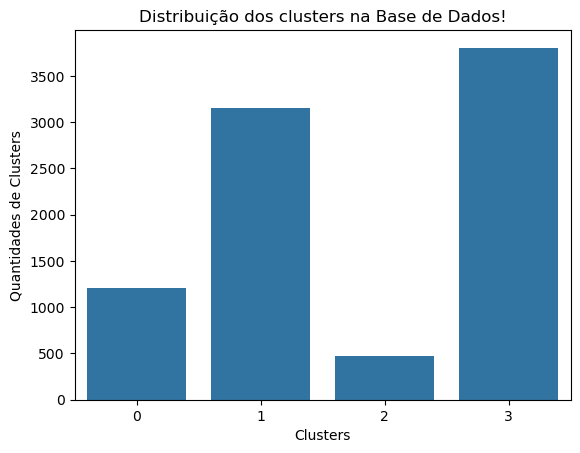

In [66]:
distribuicaoClusters = df["Cluster"].value_counts().reset_index()
plt.Figure(figsize=[15, 8])
sns.barplot(data = distribuicaoClusters, x="Cluster", y="count")
plt.xlabel("Clusters")
plt.ylabel("Quantidades de Clusters")
plt.title("Distribuição dos clusters na Base de Dados!")
plt.show() 

De acordo com o gráfico, a que a menor parte dos cluster são do numero 2 e maior parte a do número 3. Agora irei analisar o porque disso e revelar os padrões desses clusters!

In [59]:
kmeansLabelsUnicos = [0, 1, 2, 3]
for coluna in df.columns:
    print(f"Analise de [{coluna}]")
    for label in kmeansLabelsUnicos:
        dfAnalise = df[df["Cluster"] == label]
        print(f"Média do [{dfAnalise[coluna].mean()}] no cluster {label}")

Analise de [BALANCE]
Média do [4485.041966833057] no cluster 0
Média do [881.9476485229794] no cluster 1
Média do [3379.497652255814] no cluster 2
Média do [1063.917041287855] no cluster 3
Analise de [BALANCE_FREQUENCY]
Média do [0.9675749667774087] no cluster 0
Média do [0.9461831280507131] no cluster 1
Média do [0.9866935835095137] no cluster 2
Média do [0.8182568685594112] no cluster 3
Analise de [PURCHASES]
Média do [465.81755813953487] no cluster 0
Média do [1210.2543391442155] no cluster 1
Média do [7145.458837209302] no cluster 2
Média do [288.28815194532075] no cluster 3
Analise de [ONEOFF_PURCHASES]
Média do [291.6321677740864] no cluster 0
Média do [552.1912963549921] no cluster 1
Média do [4799.652135306554] no cluster 2
Média do [226.18419821240798] no cluster 3
Analise de [INSTALLMENTS_PURCHASES]
Média do [174.2698338870432] no cluster 0
Média do [658.4412614896988] no cluster 1
Média do [2347.075200845666] no cluster 2
Média do [62.312071503680336] no cluster 3
Analise de

Colunas com maiores variâncias:

BALANCE,

PURCHASES,

ONEOFF_PURCHASES,

INSTALLMENTS_PURCHASES,

CASH_ADVANCE,

CASH_ADVANCE_TRX,

PURCHASES_TRX,

PURCHASES_FREQUENCY,

CREDIT_LIMIT,

PAYMENTS,

MINIMUM_PAYMENTS,

PRC_FULL_PAYMENT.

Agora com essas colunas, vamos fazer uma analise mais aprofunda com base nas análises estatísticas usando o describe.

In [ ]:
dfAnaliseFinal = df[["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "PURCHASES_FREQUENCY", "PURCHASES_TRX", "CASH_ADVANCE", "CASH_ADVANCE_TRX", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT", "Cluster"]]

In [74]:
kmeansLabelsUnicos = [0, 1, 2, 3]
for coluna in dfAnaliseFinal.columns:
    print(f"Analise de [{coluna}]")
    for label in kmeansLabelsUnicos:
        dfAnalise = dfAnaliseFinal[dfAnaliseFinal["Cluster"] == label]
        print(f"Média do [{dfAnalise[coluna].mean()}] no cluster {label}")

Analise de [BALANCE]
Média do [4485.041966833057] no cluster 0
Média do [881.9476485229794] no cluster 1
Média do [3379.497652255814] no cluster 2
Média do [1063.917041287855] no cluster 3
Analise de [PURCHASES]
Média do [465.81755813953487] no cluster 0
Média do [1210.2543391442155] no cluster 1
Média do [7145.458837209302] no cluster 2
Média do [288.28815194532075] no cluster 3
Analise de [ONEOFF_PURCHASES]
Média do [291.6321677740864] no cluster 0
Média do [552.1912963549921] no cluster 1
Média do [4799.652135306554] no cluster 2
Média do [226.18419821240798] no cluster 3
Analise de [INSTALLMENTS_PURCHASES]
Média do [174.2698338870432] no cluster 0
Média do [658.4412614896988] no cluster 1
Média do [2347.075200845666] no cluster 2
Média do [62.312071503680336] no cluster 3
Analise de [PURCHASES_FREQUENCY]
Média do [0.27665778488372095] no cluster 0
Média do [0.8906630114104597] no cluster 1
Média do [0.9474309830866808] no cluster 2
Média do [0.1819619802839117] no cluster 3
Analise

### **Clusters Identificados e Recomendações**

Após a segmentação, os quatro clusters identificados apresentaram perfis distintos, permitindo uma visão mais abrangente e estratégica dos comportamentos financeiros dos clientes.

1. **Cluster 0: Necessidade de Crédito Imediato**

   * **Perfil:** Clientes com alto saldo disponível, alta frequência de adiantamentos em dinheiro (Cash Advance) e menor taxa de pagamentos completos.
   * **Recomendação:**

     * Planos de **empréstimos personalizados**, voltados para consolidação de dívidas e crédito imediato.

2. **Cluster 1: Clientes Moderados**

   * **Perfil:** Clientes com menor saldo disponível e comportamento equilibrado em compras e pagamentos. Representam um segmento intermediário.
   * **Recomendação:**

     * **Planos de poupança acessíveis**, para auxiliar na criação de reservas financeiras e incentivar metas básicas de economia.

3. **Cluster 2: Clientes Premium**

   * **Perfil:** Clientes com altos saldos, limites elevados, maior volume de compras e alta porcentagem de pagamentos completos.
   * **Recomendação:**

     * Produtos de **gestão de patrimônio (wealth management)**, como carteiras de investimento personalizadas e consultoria financeira.

4. **Cluster 3: Conservadores e Econômicos**

   * **Perfil:** Clientes com baixo engajamento financeiro e menores valores de compras totais.
   * **Recomendação:**

     * **Educação financeira** e produtos básicos, como contas de poupança simplificadas, para engajá-los e incentivá-los a explorar novos serviços financeiros.

---

### **Relação entre Tamanhos dos Clusters e Estratégias**

* **Clusters Menores (0 e 2):**
  Apesar de representarem uma menor parcela da base de clientes, possuem maior potencial financeiro. O Cluster 2, em especial, é estratégico para produtos premium, enquanto o Cluster 0 demanda soluções de crédito bem estruturadas.

* **Clusters Maiores (1 e 3):**
  Representam a maior parte dos clientes. É essencial oferecer produtos de entrada, como poupança e educação financeira, para aumentar o engajamento e fomentar a fidelização no longo prazo.

---

### **Conclusão e Próximos Passos**

A análise mostrou que o uso de quatro clusters foi ideal para capturar a diversidade dos comportamentos financeiros, enquanto reduziu o ruído e otimizou a segmentação. Com base nesses perfis, recomendações específicas foram propostas para atender às necessidades individuais de cada segmento.

Os próximos passos incluem:

1. **Implementação:** Oferecer produtos financeiros segmentados conforme os perfis identificados.
2. **Monitoramento:** Avaliar continuamente o impacto das recomendações para refinar os produtos e estratégias.
3. **Expansão:** Testar a aplicação desta abordagem em outros segmentos de mercado, para ampliar o alcance e impacto das soluções financeiras oferecidas.

Essa segmentação permitirá à organização otimizar suas estratégias comerciais, aumentar a satisfação dos clientes e maximizar a eficiência operacional, posicionando-se de forma competitiva no mercado financeiro.
